### 宿題４

「ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。
データの属性を理解し、分析をするためにデータを加工した後、
データの可視化を行うことで問題を発見していくプロセスを学びます。」

宿題4-1
「join_data_2」に "quantity" と "item_price" をかけて新たに "price" という列を作成し、「join_dtata_3.csv」として保存してください。

宿題4-2
「join_data_3」と「transaction」の"price"の総合計が同じになることを確認してください。

宿題4-3
「join_data_3」の以下の統計量を調べてください。
・欠損値
・各項目の統計（ヒント：Pandas の describe メソッドを使う）
・"payment_date"の始まりと終わり

宿題4-4
「join_data_3」の月ごとの売り上げ合計を求めてください。

宿題4-5
「join_data_3」の月別、商品別の売り上げと個数を集計してください。
（ヒント）Pandas のメソッドの groupby と pivot_table を使う。

宿題4-6
「join_data_3」の商品別の月間売上推移の折れ線グラフを描いてください。
（ヒント）Pandas の pivot_table と Matplotlib の pyplot を用いる。

### 答案

宿題４－１から順に取り組みます。

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('join_data_2.csv', parse_dates=['payment_date','registration_date','birth'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 16 columns):
detail_id             7144 non-null int64
transaction_id        7144 non-null object
item_id               7144 non-null object
quantity              7144 non-null int64
payment_date          7144 non-null datetime64[ns]
customer_id           7144 non-null object
customer_name         7144 non-null object
registration_date     7144 non-null datetime64[ns]
customer_name_kana    7144 non-null object
email                 7144 non-null object
gender                7144 non-null object
age                   7144 non-null int64
birth                 7144 non-null datetime64[ns]
pref                  7144 non-null object
item_name             7144 non-null object
item_price            7144 non-null int64
dtypes: datetime64[ns](3), int64(4), object(9)
memory usage: 893.1+ KB


In [3]:
df = df.assign(price = df['quantity'] * df['item_price'])
df.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989-07-15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945-11-29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977-05-17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972-03-17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944-12-17,長崎県,PC-B,85000,170000


In [4]:
df.to_csv('join_data_3_.csv')

宿題４－１完了。

続いて４－２を確認します。

>「join_data_3」と「transaction」の"price"の総合計が同じになることを確認してください。

In [5]:
df['price'].sum()

971135000

In [6]:
df2 = pd.read_csv('transaction.csv')
df2.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
df2['price'].sum()

971135000

確認できました、

続いて４－３を調べます。
>「join_data_3」の以下の統計量を調べてください。 ・欠損値 ・各項目の統計（ヒント：Pandas の describe メソッドを使う） ・"payment_date"の始まりと終わり

info()で見た通り、欠損値はありません。

統計量を調べます。

In [8]:
df.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


続いて"payment_date"の始まりと終わり

In [9]:
df.sort_values(by='payment_date').head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989-07-15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945-11-29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977-05-17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972-03-17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944-12-17,長崎県,PC-B,85000,170000


In [10]:
df.sort_values(by='payment_date').tail()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,宍戸 明,2019-01-04 13:24:40,ししど あきら,shishido_akira@example.com,M,64,1955-01-13,福井県,PC-D,180000,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945-02-03,北海道,PC-B,85000,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979-05-25,福島県,PC-A,50000,100000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963-02-21,東京都,PC-B,85000,85000
7143,7143,T0000006898,S002,1,2019-07-31 23:41:38,AS834214,田原 結子,2019-04-07 03:20:19,たはら ゆうこ,tahara_yuuko@example.com,F,74,1944-12-18,愛知県,PC-B,85000,85000


2019-02-01 01:36:57から2019-07-31 23:41:38まで、約５カ月分のデータのようです

続いて４－４

>「join_data_3」の月ごとの売り上げ合計を求めてください。

In [11]:
df.set_index('payment_date').resample(rule="M").sum()

,detail_id,quantity,age,item_price,price
payment_date,,,,,
2019-02-28,676866,1403,59279,142805000,160185000
2019-03-31,2071474,1427,58996,142980000,160370000
2019-04-30,3476816,1421,59246,143670000,160510000
2019-05-31,4812795,1390,58195,139655000,155420000
2019-06-30,6369999,1446,61070,147090000,164030000
2019-07-31,8106846,1485,62312,153215000,170620000


続いて４－５

>「join_data_3」の月別、商品別の売り上げと個数を集計してください。 （ヒント）Pandas のメソッドの groupby と pivot_table を使う。

In [12]:
df.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989-07-15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945-11-29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977-05-17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972-03-17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944-12-17,長崎県,PC-B,85000,170000


In [13]:
df2 = pd.pivot_table(df, index='payment_date', columns='item_name', values=['price','quantity']).resample(rule="M").sum()
df2

price                                                  \
item_name             PC-A        PC-B        PC-C        PC-D        PC-E   
payment_date                                                                 
2019-02-28    2.387500e+07  25160000.0  19380000.0  30420000.0  59220000.0   
2019-03-31    2.570000e+07  25500000.0  19080000.0  25740000.0  63000000.0   
2019-04-30    2.565000e+07  23120000.0  21840000.0  24300000.0  64050000.0   
2019-05-31    2.442500e+07  25160000.0  20400000.0  25740000.0  57540000.0   
2019-06-30    2.554167e+07  23970000.0  21600000.0  28080000.0  63000000.0   
2019-07-31    2.482500e+07  28135000.0  19440000.0  26100000.0  70140000.0   

                quantity                              
item_name           PC-A   PC-B   PC-C   PC-D   PC-E  
payment_date                                          
2019-02-28    477.500000  296.0  161.5  169.0  282.0  
2019-03-31    514.000000  300.0  159.0  143.0  300.0  
2019-04-30    513.000000  272.0  182.0  135.0  305.0  
2019-05-31    488.500000  296.0  170.0  143.0  274.0  
2019-06-30    510.833333  282.0  180.0  156.0  300.0  
2019-07-31    496.500000  331.0  162.0  145.0  334.0

最後、４－６

>「join_data_3」の商品別の月間売上推移の折れ線グラフを描いてください。 （ヒント）Pandas の pivot_table と Matplotlib の pyplot を用いる。

In [14]:
#jupyternotebook内でmatplotlibで図を描写するときの必須のおまじない
%matplotlib inline 
import matplotlib.pyplot as plt

# おまじない: 以下を実行するとプロットスタイルが変更されていい感じになる
plt.style.use('ggplot') 

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


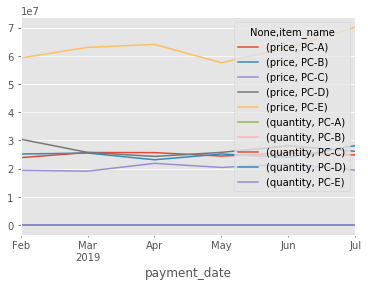

In [15]:
df2.plot()

月ごとに集計しないとどうなるのか、見てみます。

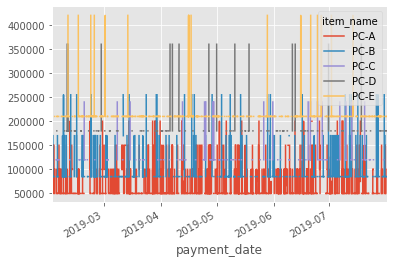

In [16]:
pd.pivot_table(df, index='payment_date', columns='item_name', values='price').plot()

よく分かりませんね。週ごとの集計ではどうでしょうか。

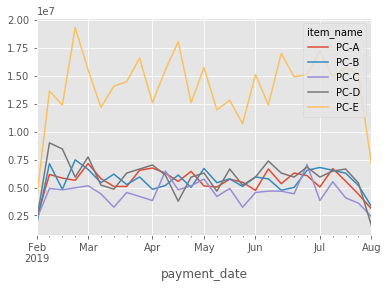

In [17]:
pd.pivot_table(df, index='payment_date', columns='item_name', values='price').resample(rule="W").sum().plot()

ふむふむ。日ごとではどうでしょうか。

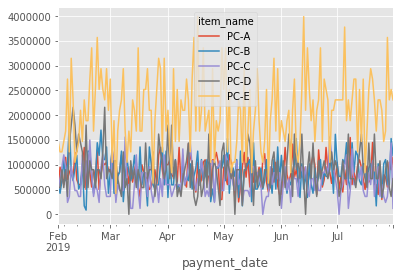

In [18]:
pd.pivot_table(df, index='payment_date', columns='item_name', values='price').resample(rule="D").sum().plot()

週ごとの集計くらいが見やすそうです。

以上で宿題を提出します。